In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)


batch_size = 100
learning_rate = 0.001
training_epochs = 50


from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir = './logs', write_graph = True)

model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(27, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate, amsgrad=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size, callbacks = [tensorboard])

score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

#history замени на что-то тут и в 2 следующих клетках(через одну)

#клетка ниже - просто посмотреть. Зайди по ссылке - глянь. Мб прригодится. Хоть похоже на графики после нее. Надо подумать что лучше. Имхо, картинки с колбека - лучше

Epoch 1/50
65000/65000 [==============================] - 10s 152us/step - loss: 1.0175 - acc: 0.6890
Epoch 2/50
65000/65000 [==============================] - 9s 138us/step - loss: 0.4299 - acc: 0.8607
Epoch 3/50
65000/65000 [==============================] - 9s 141us/step - loss: 0.3458 - acc: 0.8875
Epoch 4/50
65000/65000 [==============================] - 9s 143us/step - loss: 0.3040 - acc: 0.9008
Epoch 5/50
65000/65000 [==============================] - 9s 142us/step - loss: 0.2780 - acc: 0.9076
Epoch 6/50
65000/65000 [==============================] - 9s 142us/step - loss: 0.2582 - acc: 0.9125
Epoch 7/50
65000/65000 [==============================] - 9s 139us/step - loss: 0.2445 - acc: 0.9170
Epoch 8/50
65000/65000 [==============================] - 9s 141us/step - loss: 0.2369 - acc: 0.9194
Epoch 9/50
65000/65000 [==============================] - 9s 141us/step - loss: 0.2221 - acc: 0.9235
Epoch 10/50
65000/65000 [==============================] - 9s 141us/step - loss: 0.2176 - 

In [ ]:
#!tensorboard --logdir=./logs

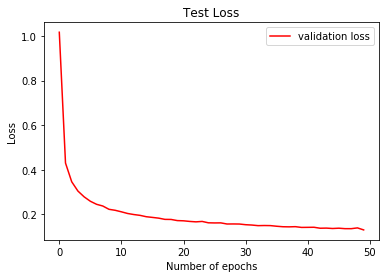

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='r', label= "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



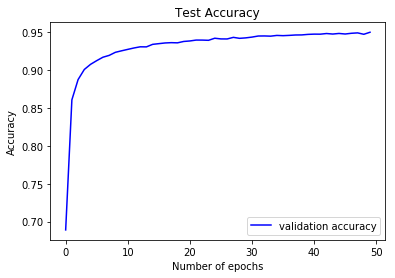

In [5]:
plt.plot(history.history['acc'], color='b', label= "validation accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



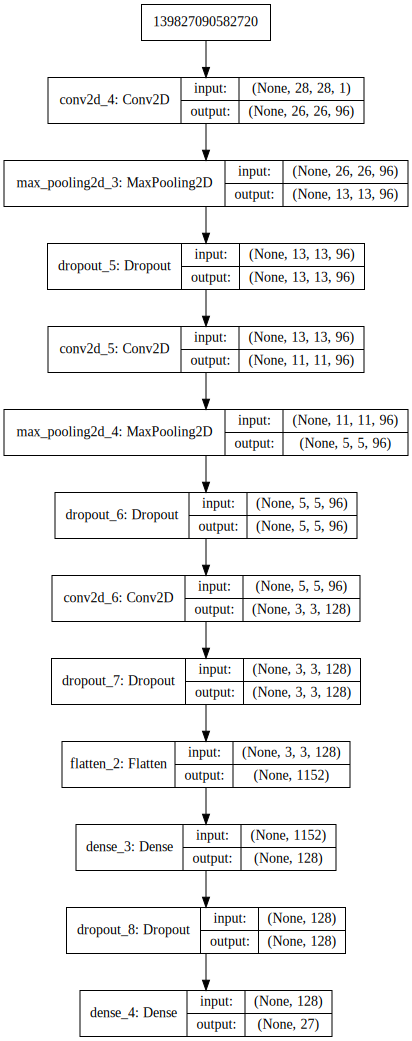

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

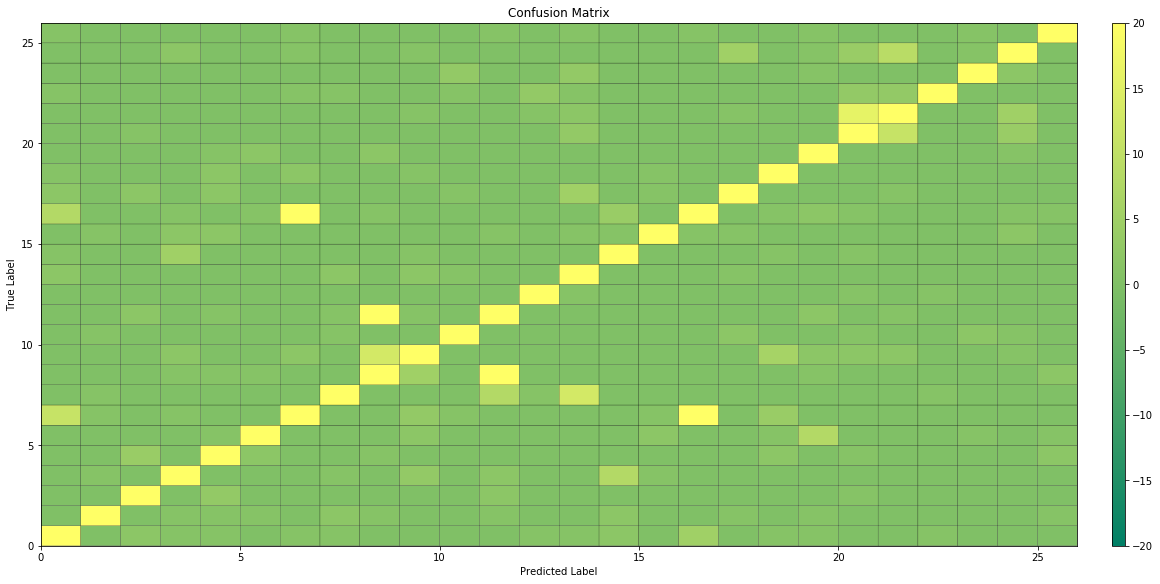

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.cm as cm

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig,ax = plt.subplots(figsize=(16,8), constrained_layout = True)
im = ax.pcolor(confusion_mtx, cmap=cm.summer, edgecolors='k', vmin=-20, vmax=20, linewidths=0.2)

#sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, linecolor="Green", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
fig.colorbar(im, ax = ax, aspect=80)
plt.show()

In [12]:
while(score[1]<0.95):
    history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=1,
    verbose=0)
    score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.1557463905808444, 0.9501538461538461]


,0
count,26.000000
mean,3.846154
std,4.700066
min,0.617284
25%,1.234568
50%,2.083333
75%,3.626543
max,17.901235


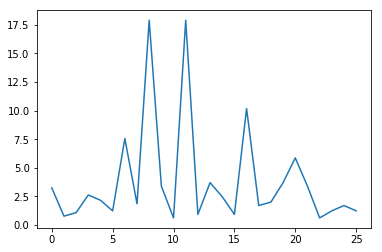

In [86]:
args = np.zeros(26)

for i in range (y_test.shape[0]):
    x = x_test[i].reshape(1,28,28,1)
    y = np.argmax(model.predict(x))
    if np.argmax(y_test[i]) != y:
        args[y - 1] += 1
        
args = args*100/sum(args)

plt.plot(range(26), args)
pd.DataFrame(data=100*args/sum(args)).describe()

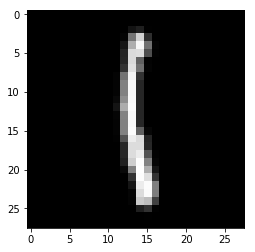

l
l


In [87]:
plt.imshow(x_train[7].T.reshape((28, 28)), cmap='gray')
plt.show()

x = x_train[7].reshape(1,28,28,1)
y = np.argmax(model.predict(x))

def shit(s):
    print(chr(ord('a') + s - 1))

shit(np.argmax(y_train[7]))

shit(y)